## Bike Sharing Analysis and graphs

### Load dependencies

In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline


### Load the datasets

In [ ]:
data_dir = Path.cwd()

day_df = pd.read_csv(data_dir / 'day.csv', parse_dates=['dteday'])
hour_df = pd.read_csv(data_dir / 'hour.csv', parse_dates=['dteday'])

#make a normal timeline 2011-01-01 08:00:00
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')


### Hour overview

In [ ]:
hour_df.head()

In [ ]:
hour_df.describe()

### Days overview

In [ ]:
day_df.head()

In [ ]:
day_df.describe()

### Data preparation for visualization

In [ ]:
# Create proper month labels and aggregate monthly data
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
year_labels = {0: '2011', 1: '2012'}

# Prepare data with labels
day_df['month_label'] = day_df['mnth'].map(month_labels)
day_df['season_label'] = day_df['season'].map(season_labels)
day_df['year_label'] = day_df['yr'].map(year_labels)

# Prepare aggregated data
monthly_totals = day_df.groupby('mnth')['cnt'].sum().reset_index()
monthly_totals['month_label'] = monthly_totals['mnth'].map(month_labels)

season_totals = day_df.groupby('season')['cnt'].sum().reset_index()
season_totals['season_label'] = season_totals['season'].map(season_labels)

monthly_by_year = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_by_year['year_label'] = monthly_by_year['yr'].map(year_labels)
monthly_by_year['month_label'] = monthly_by_year['mnth'].map(month_labels)

hourly_profile = hour_df.groupby('hr')['cnt'].mean()

# Define season order and colors
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_colors = ['#89CFF0', '#90EE90', '#FFD700', '#FF8C00']


### Total rentals by month
Bar chart showing the total number of bike rentals for each month across 2011-2012, revealing seasonal patterns.

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_totals['month_label'], monthly_totals['cnt'], 
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Total Bike Rentals by Month (2011-2012)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Total rentals by season
Bar chart comparing bike rental totals across the four seasons, showing which season has the highest demand.

In [ ]:
plt.figure(figsize=(10, 6))
season_totals_ordered = season_totals.set_index('season_label').reindex(season_order).reset_index()
bars = plt.bar(season_totals_ordered['season_label'], season_totals_ordered['cnt'],
               color=season_colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Total Bike Rentals by Season (2011-2012)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Monthly rentals comparison: 2011 vs 2012
Line chart comparing monthly rental patterns between 2011 and 2012, showing year-over-year growth trends.

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_by_year, x='month_label', y='cnt', hue='year_label',
             marker='o', linewidth=2.5, markersize=8, palette=['#1f77b4', '#ff7f0e'])
plt.title('Monthly Rentals: 2011 vs 2012', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Rentals', fontsize=12, fontweight='bold')
plt.legend(title='Year', fontsize=10, title_fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Average hourly demand
Line chart showing average bike rentals by hour of day, revealing peak usage times and daily patterns.

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_profile.index, y=hourly_profile.values, marker='o', 
             linewidth=2.5, markersize=8, color='steelblue')
plt.xticks(range(0, 24, 2))
plt.title('Average Hourly Demand', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hour of day', fontsize=12, fontweight='bold')
plt.ylabel('Average rides (cnt)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Visualize target distribution
A histogram of total rides (`cnt`) in the daily data highlights seasonality and spread.

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Daily Total Rides Distribution')
plt.xlabel('Daily total rides (cnt)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Correlation heatmap
Heatmap showing correlations between numeric variables to identify relationships between features.

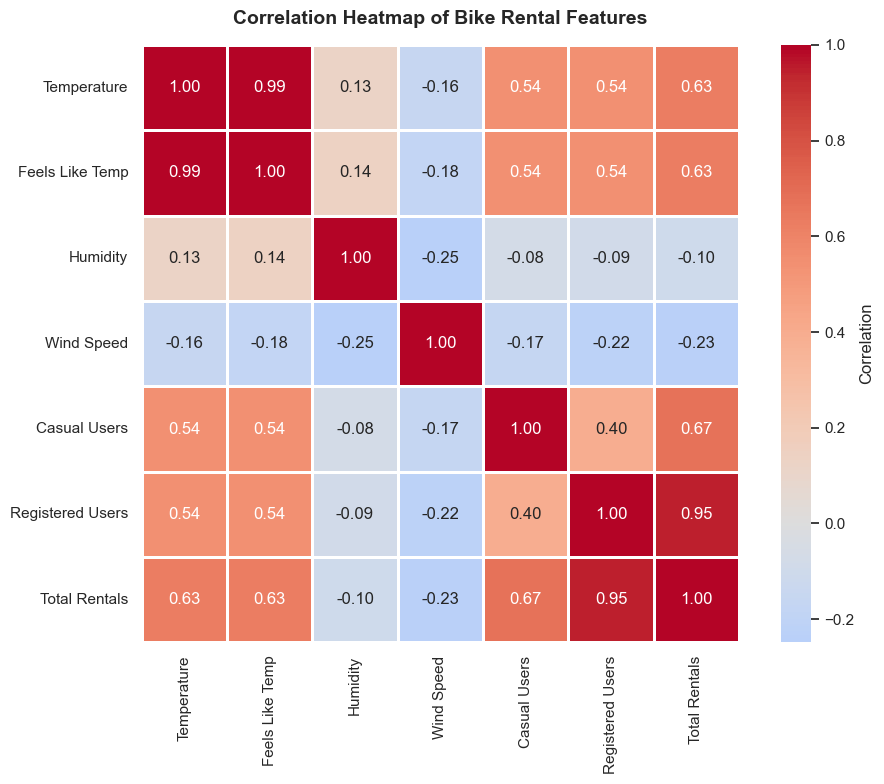

In [26]:
# Select relevant numeric columns for correlation analysis
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = day_df[numeric_cols].corr()

# Create more readable labels
readable_labels = {
    'temp': 'Temperature',
    'atemp': 'Feels Like Temp',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'casual': 'Casual Users',
    'registered': 'Registered Users',
    'cnt': 'Total Rentals'
}

# Rename for display
correlation_matrix_renamed = correlation_matrix.rename(index=readable_labels, columns=readable_labels)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_renamed, 
            annot=True,  # Show correlation values
            fmt='.2f',   # Format to 2 decimal places
            cmap='coolwarm',  # Color scheme
            center=0,    # Center colormap at 0
            square=True, # Make cells square-shaped
            linewidths=1,  # Add gridlines
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Bike Rental Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


### Time-based features correlation
Analyzing how time-based features (hour, day, month, year) correlate with bike rentals.

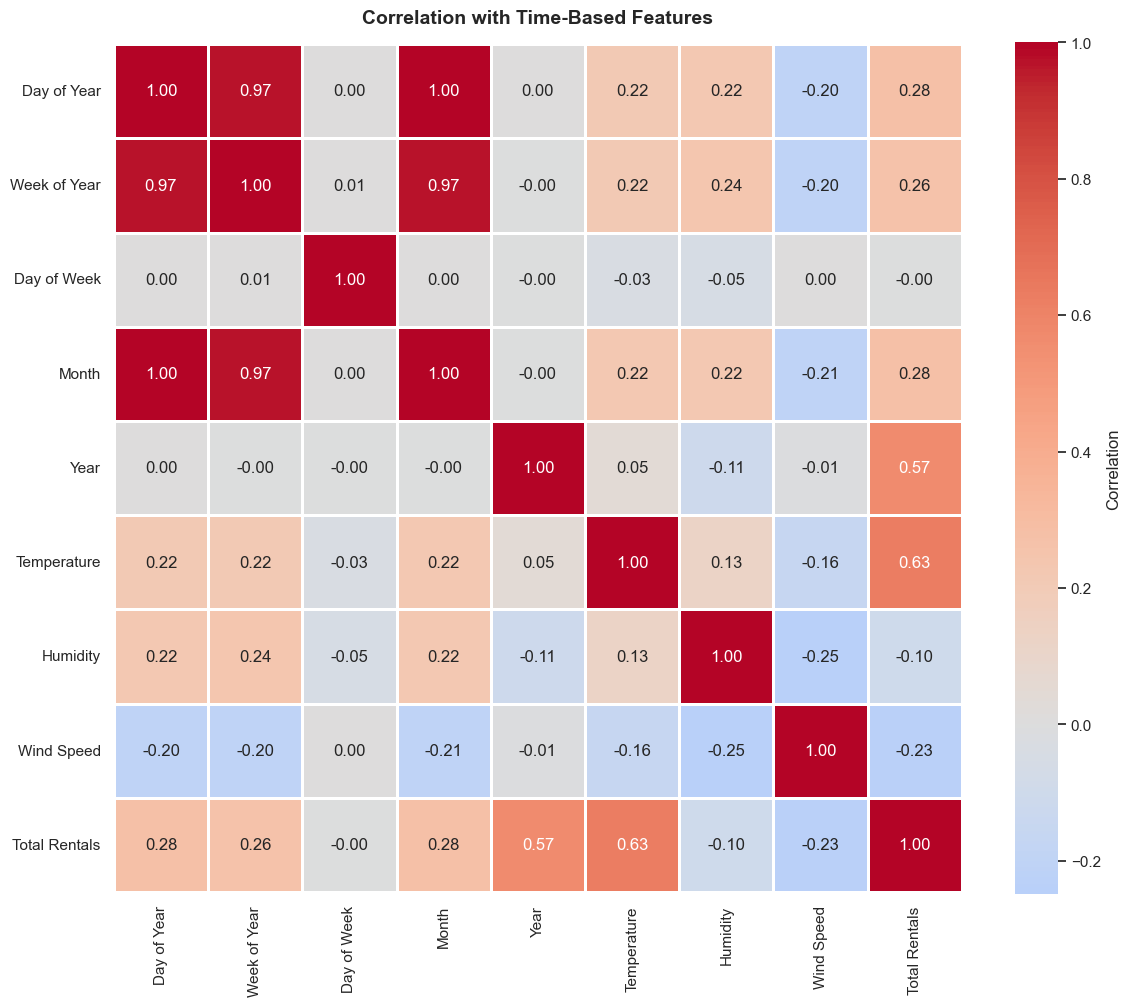

In [27]:
# Extract time-based numeric features from datetime
day_df['day_of_year'] = day_df['dteday'].dt.dayofyear  # 1-365
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek  # 0=Monday, 6=Sunday
day_df['week_of_year'] = day_df['dteday'].dt.isocalendar().week  # 1-52

# Select columns including time features
time_cols = ['day_of_year', 'week_of_year', 'day_of_week', 'mnth', 'yr', 
             'temp', 'hum', 'windspeed', 'cnt']
time_correlation = day_df[time_cols].corr()

# Create readable labels
time_labels = {
    'day_of_year': 'Day of Year',
    'week_of_year': 'Week of Year',
    'day_of_week': 'Day of Week',
    'mnth': 'Month',
    'yr': 'Year',
    'temp': 'Temperature',
    'hum': 'Humidity',
    'windspeed': 'Wind Speed',
    'cnt': 'Total Rentals'
}

time_correlation_renamed = time_correlation.rename(index=time_labels, columns=time_labels)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(time_correlation_renamed, 
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation with Time-Based Features', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


### Rentals by day of week
Bar chart showing average bike rentals for each day of the week to see if weekends differ from weekdays.

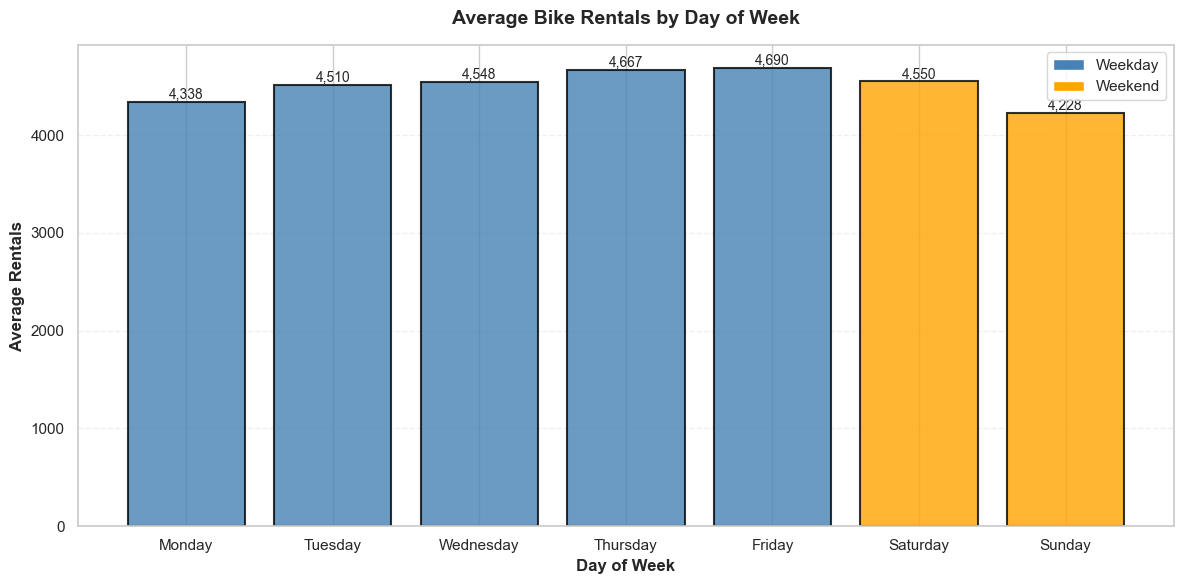

Average Weekday Rentals: 4,551
Average Weekend Rentals: 4,390
Difference: 161 (3.5%)


In [28]:
# Create day of week labels
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_df['day_name'] = day_df['day_of_week'].map(day_names)

# Calculate average rentals by day of week
daily_avg = day_df.groupby(['day_of_week', 'day_name'])['cnt'].mean().reset_index()

# Define colors: weekdays vs weekends
colors = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'orange', 'orange']

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(daily_avg['day_name'], daily_avg['cnt'], 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('Average Bike Rentals by Day of Week', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Average Rentals', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Weekday'),
                   Patch(facecolor='orange', label='Weekend')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Print statistics
weekday_avg = day_df[day_df['day_of_week'] < 5]['cnt'].mean()
weekend_avg = day_df[day_df['day_of_week'] >= 5]['cnt'].mean()
print(f"Average Weekday Rentals: {weekday_avg:,.0f}")
print(f"Average Weekend Rentals: {weekend_avg:,.0f}")
print(f"Difference: {abs(weekday_avg - weekend_avg):,.0f} ({abs(weekday_avg - weekend_avg)/weekday_avg*100:.1f}%)")
